# Documents DB File

In [ ]:
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from techminer import *

directory = "../data/processed/debug"
file_name = "../data/raw/fintech-scopus.csv"
import_scopus_file(file_name, directory)

# !cat ../data/processed/debug/filter.yaml

# Thesaurus

In [ ]:
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from techminer import *

directory = "../data/processed/debug"

# clean_institutions(directory)
# clean_keywords(directory)
# apply_thesaurus(directory, thesaurus_file="keywords.txt", input_column="author_keywords", output_column="author_keywords_thesaurus", strict=False)
# create_thesaurus(directory, column="keywords", thesaurus_file="test_thesaurus.txt", sep="; ")

# Basic Analysis

In [ ]:
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from techminer import *

directory = "../data/processed/debug"

# core_authors(directory)
# core_sources(directory)
# coverage(directory)
# top_documents(directory)
# summary(directory)


# time_analysis(directory)
# terms_analysis(directory, column='authors')
# impact_analysis(directory, column="authors")


# terms_per_year_table(dirpath_or_records="../data/processed/debug", column='countries')

# BigraphAnalyzer(dirpath_or_records="../data/processed/debug", column='countries', by='countries').table_

# Plots

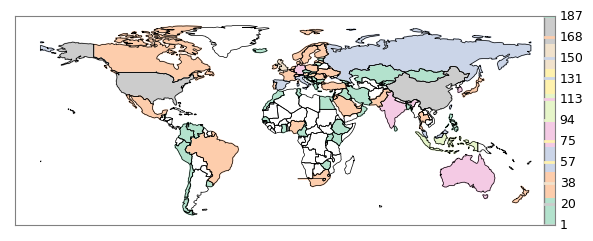

In [1]:
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from techminer import *

directory = "../data/processed/debug"


# bradford_plot(directory)
# lotka_plot(directory)
# worldmap(directory, metric="num_documents")

In [ ]:
import pandas as pd

pd.read_csv("../data/processed/debug/documents.csv").iso_source_name.value_counts()

In [ ]:
pd.read_csv("../data/processed/debug/documents.csv").columns